<a href="https://colab.research.google.com/github/sandipbnkr/MachineLearning/blob/main/naive_baye.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#naive bayes implementation session 25 Nov 2023
from sklearn.datasets import load_digits

In [ ]:
d=load_digits()
d.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [ ]:
print(d['DESCR'])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [ ]:
d.data[0] #one image in array form

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [ ]:
d.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

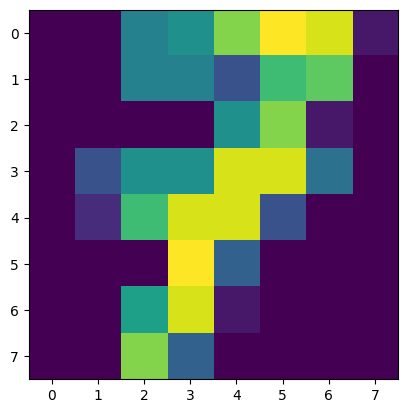

In [ ]:
#display images
import matplotlib.pyplot as plt
plt.imshow(d.images[7])

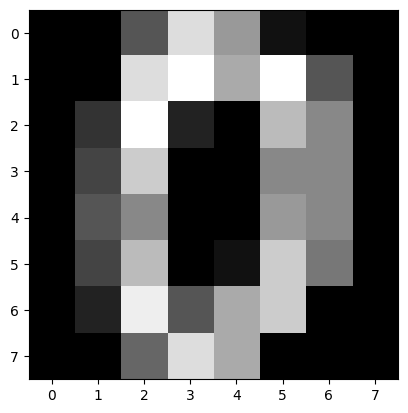

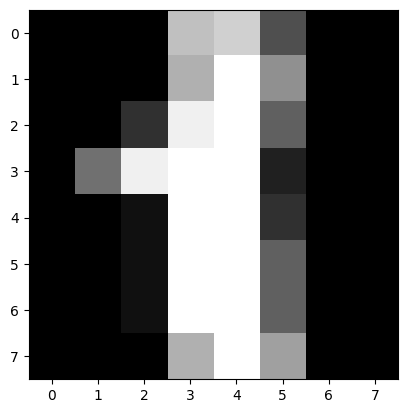

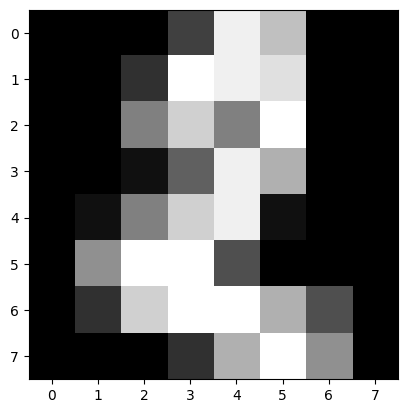

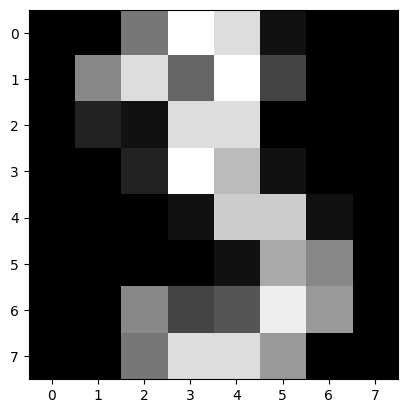

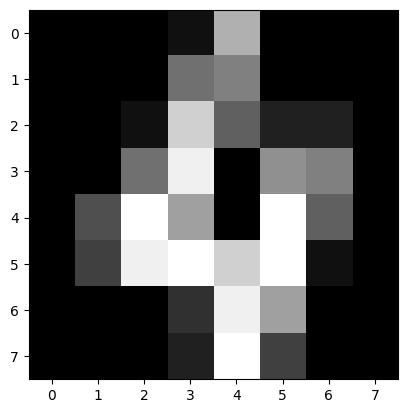

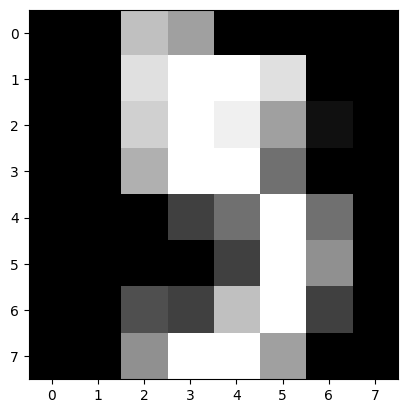

In [ ]:
#to print 0 to 5 images
for i in range(6):
  plt.imshow(d.images[i])
  plt.gray()
  plt.show()

In [ ]:
#lets form data
import pandas as pd
df=pd.DataFrame(d.data,columns=d.feature_names)

In [ ]:
d.target

array([0, 1, 2, ..., 8, 9, 8])

In [ ]:
#check unique target
import numpy as np
np.unique(d.target)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
df['output']=d.target
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,output
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [ ]:
#split the data into training
from sklearn.model_selection import train_test_split


In [ ]:
X=df.drop(columns='output')
y=df.output

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,y,train_size=.8)

In [ ]:
#
from sklearn.naive_bayes import BernoulliNB

In [ ]:
bnb=BernoulliNB()
bnb.fit(x_train,y_train)
bnb.score(x_train,y_train)*100

86.22129436325679

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)
gnb.score(x_train,y_train)*100

88.16979819067502

In [ ]:
from sklearn.naive_bayes import MultinomialNB
mnb=GaussianNB()
mnb.fit(x_train,y_train)
mnb.score(x_train,y_train)*100

88.16979819067502

In [ ]:
#score is more so lets use multinomial NB
y_pred=mnb.predict(x_test)

In [ ]:
#perforamnce metrics
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
cm=confusion_matrix(y_test,y_pred)

Text(120.72222222222221, 0.5, 'Actual')

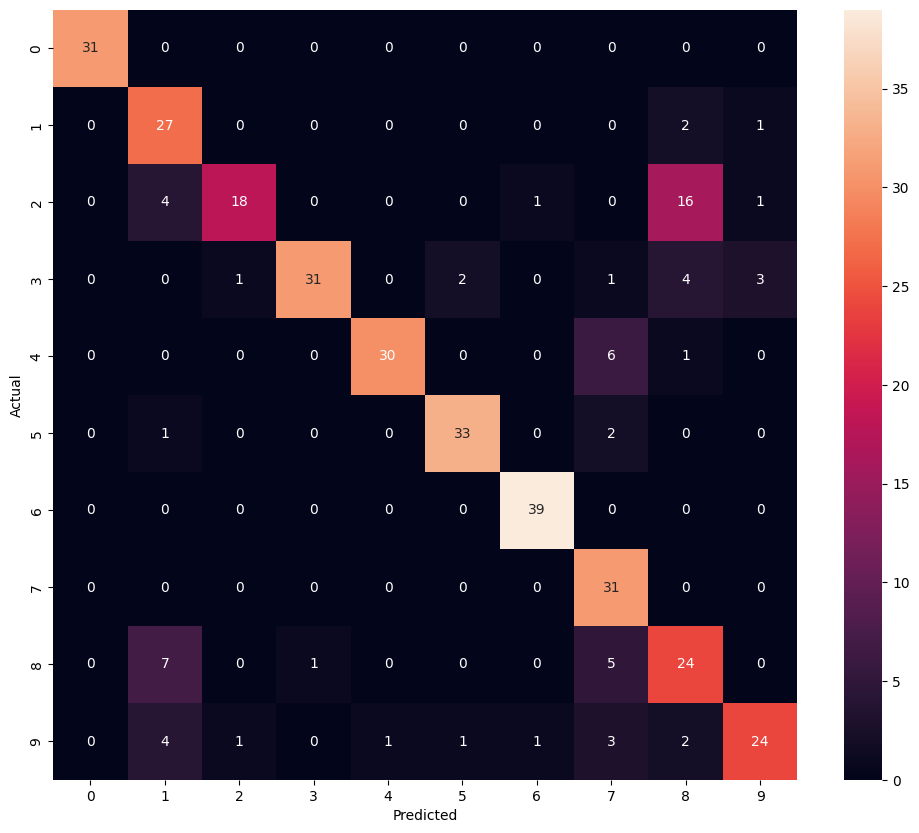

In [ ]:
import seaborn as sns
plt.figure(figsize=(12,10))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [ ]:
sum(y_test==8)
#this is to check rowsise data
#see corresponding row number get the total and count match
#coloumnwise prediction data and rowsise ctual data
see

NameError: ignored

In [ ]:
#classification report
print(classification_report (y_test,y_pred))

In [ ]:
#support 360 incidents in test
#len(y_test)
#in output we have 0 to 9 means 10 category
#if u add all then total becomes  same only
#Assignment : import IRIS dataset and apply Navive Bayes



In [ ]:
from sklearn.datasets import load_iris
i=load_iris()
df1=pd.DataFrame(i.data,columns=i.feature_names)

In [ ]:
i.keys()

In [ ]:
i.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
df1['output']=i.target

In [ ]:
np.unique(i.target)

array([0, 1, 2])

In [ ]:
df1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),output
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
from sklearn.model_selection import train_test_split
X = df1.drop(columns='output')
y = df1.output


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=.8)


In [ ]:
bnb = BernoulliNB() #For binary data
bnb.fit(X_train,y_train)
bnb.score(X_train,y_train)*100


36.666666666666664

In [ ]:
from sklearn.naive_bayes import MultinomialNB #Its better than bnb
mnb = MultinomialNB() #Its assumption hence giving better results
mnb.fit(X_train,y_train)
mnb.score(X_train,y_train)*100

83.33333333333334

In [ ]:

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB() #Continues features
gnb.fit(X_train,y_train)
gnb.score(X_train,y_train)*100

95.0

In [ ]:
#From above result we are going to continue with MultinomialNB
#Test phase

y_pred = gnb.predict(X_test)
y_pred[:5] #Predicted result


array([1, 2, 1, 1, 2])

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report


In [ ]:
cm1 = confusion_matrix(y_test,y_pred)
cm1

array([[ 6,  0,  0],
       [ 0, 13,  1],
       [ 0,  0, 10]])

Text(70.72222222222221, 0.5, 'Actual')

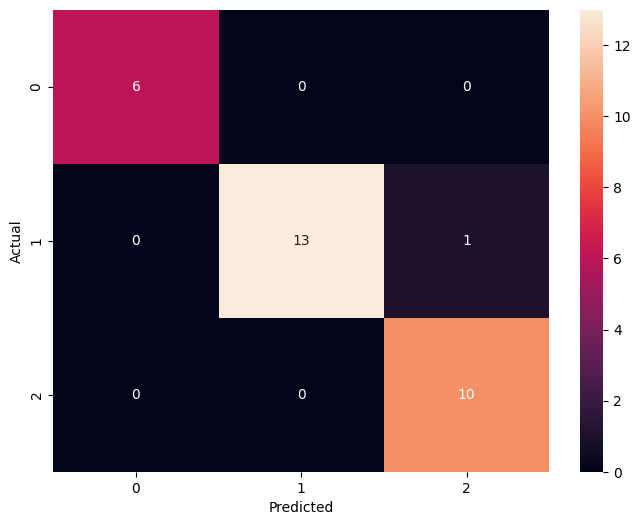

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(cm1,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [ ]:
sum(y_test == 1) #Row wise addition(Actual)


14

In [ ]:
sum(y_pred == 2) #Column wise addition(Predicted)


11

In [ ]:
print(classification_report(y_test,y_pred))
#Support = 30 .. dividation of 30



              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      0.93      0.96        14
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.98      0.97        30
weighted avg       0.97      0.97      0.97        30



In [ ]:
sum(y_test == 0) #supoort = 30


6